# Data Understanding

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc #TO FREE THE MEMORY
import cv2
import warnings
warnings.filterwarnings("ignore")


### Importing DataSet

In [5]:
digits=pd.read_csv("train.csv")
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Cleaning

In [49]:
#digits.describe()
zero=digits.iloc[4,1:]
zero.shape

(784,)

In [17]:
zero.values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   1,  25, 130, 155, 254, 254, 254, 157,  30,
         2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   8, 103, 253, 253, 253, 253, 253, 253,
       253, 253, 114,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  11, 208, 253, 253, 253, 25

In [18]:
zero=zero.values.reshape(28,28)

(28, 28)
AxesImage(54,36;334.8x217.44)


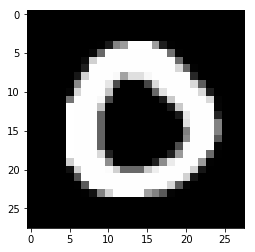

In [25]:
print(zero.shape)
#print(plt.imshow(zero))
print(plt.imshow(zero,cmap="gray"))


In [32]:
# Visualize the Array
print(zero[5:-5,5:-5])
#indices=[0,1,2,3,4,...]
#reverse=[-n,......,-3,-2,-1]

[[  0   0   0   8 103 253 253 253 253 253 253 253 253 114   2   0   0   0]
 [  0   0  11 208 253 253 253 253 253 253 253 253 253 253 107   0   0   0]
 [  0   0  31 253 253 253 253 253 253 253 253 253 253 253 215 101   3   0]
 [  0  23 210 253 253 253 248 161 222 222 246 253 253 253 253 253  39   0]
 [  0 136 253 253 253 229  77   0   0   0  70 218 253 253 253 253 215  91]
 [  5 214 253 253 253 195   0   0   0   0   0 104 224 253 253 253 253 215]
 [116 253 253 253 247  75   0   0   0   0   0   0  26 200 253 253 253 253]
 [254 253 253 253 195   0   0   0   0   0   0   0   0  26 200 253 253 253]
 [254 253 253 253  99   0   0   0   0   0   0   0   0   0  25 231 253 253]
 [254 253 253 253  99   0   0   0   0   0   0   0   0   0   0 223 253 253]
 [254 253 253 253  99   0   0   0   0   0   0   0   0   0   0 127 253 253]
 [254 253 253 253  99   0   0   0   0   0   0   0   0   0   0 139 253 253]
 [254 253 253 253  99   0   0   0   0   0   0   0   0   0  78 248 253 253]
 [254 253 253 253 216  34

In [40]:
count=digits.label.astype("category").value_counts()
print(count)


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [47]:
print(100*round(count/len(digits.index),4))

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64


With Each label the datasets have points between 9-11% which means the dataset is balanced. 

This is important to check the dataset is balanced or not because ***SVM rearly perform better in imbalanced data***

In [48]:
# missing values
digits.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [50]:
# Rescale Features

# Data Preparation

In [51]:
X=digits.iloc[:,1:]
y=digits.iloc[:,0]

from sklearn.preprocessing import scale
X=scale(X)


In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8400, 784)
(33600, 784)
(8400,)
(33600,)


In [61]:
del X_test # to free up some memory
del y_test # to free up some memory


# Model Building

In [57]:
from sklearn.svm import SVC
from sklearn import metrics


In [58]:
linear_svm=SVC(kernel="linear")

linear_svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [64]:
y_pred=linear_svm.predict(X_test)

In [66]:
# evaluation: accuracy
# C(i, j) represents the number of points known to be in class i 
# but predicted to be in class j

confusion=metrics.confusion_matrix(y_true=y_test,y_pred=y_pred)
confusion

array([[3153,    0,   12,    2,   11,   27,   34,    2,   13,    1],
       [   0, 3701,   13,    9,    3,    2,    1,    8,   22,    5],
       [  37,   27, 3037,   73,   44,   13,   40,   24,   59,   15],
       [  16,   16,   83, 3098,    9,  120,   12,   31,   67,   31],
       [   4,   14,   26,    2, 3069,    8,   13,   11,    2,  103],
       [  36,   33,   22,  169,   30, 2644,   42,    3,   60,   18],
       [  32,   10,   48,    1,   40,   35, 3131,    0,   13,    0],
       [  10,   28,   48,   16,   44,   12,    1, 3175,    2,  190],
       [  27,   60,   39,  107,   35,  118,   24,   26, 2803,   32],
       [  20,   18,   22,   35,  182,   14,    0,  137,   22, 2863]],
      dtype=int64)

In [68]:
accuracy=metrics.accuracy_score(y_pred=y_pred,y_true=y_test)
print("accuracy: {}".format(accuracy))

accuracy: 0.9129166666666667


In [69]:
#class - wise accuracy
class_wise=metrics.classification_report(y_pred=y_pred,y_true=y_test)
print(class_wise)

             precision    recall  f1-score   support

          0       0.95      0.97      0.96      3255
          1       0.95      0.98      0.96      3764
          2       0.91      0.90      0.90      3369
          3       0.88      0.89      0.89      3483
          4       0.89      0.94      0.91      3252
          5       0.88      0.86      0.87      3057
          6       0.95      0.95      0.95      3310
          7       0.93      0.90      0.91      3526
          8       0.92      0.86      0.89      3271
          9       0.88      0.86      0.87      3313

avg / total       0.91      0.91      0.91     33600



In [71]:
# run gc.collect()(garbage_collect ) to free up memory
# because Dataset is larger and SVM is computationally expensive
# it will throw memory error while training

gc.collect()

2342

### Non Linear SVM

In [73]:
# Using RBF kernel

In [74]:
model=SVC(kernel="rbf")

model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
predictions=model.predict(X_test)

In [77]:
print(" accuarcy: {}".format(metrics.accuracy_score(y_true=y_test,y_pred=predictions)))

 accuarcy: 0.9367261904761904


In [78]:
# Accuracy of non_linear is linear

In [79]:
from sklearn.model_selection import GridSearchCV
params={"C":[1,10,100],"gamma":[1e-2,1e-3,1e-4]}

In [80]:
svc_model=SVC(kernel="rbf")

In [81]:
cl=GridSearchCV(estimator=svc_model,param_grid=params,scoring="accuracy")

In [82]:
cl.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [83]:
cv_results=pd.DataFrame(cl.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,109.542418,0.615898,25.639924,0.150946,1,0.01,"{'C': 1, 'gamma': 0.01}",0.738944,0.722500,0.746423,0.735952,0.009990,9,1.000000,1.000000,1.000000,1.000000,0.000000
1,27.612167,0.313369,15.374100,0.453686,1,0.001,"{'C': 1, 'gamma': 0.001}",0.926890,0.928214,0.920601,0.925238,0.003320,3,0.972302,0.970357,0.971449,0.971369,0.000796
2,40.742158,0.648906,20.466943,0.330854,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.894080,0.907500,0.888770,0.896786,0.007880,6,0.913688,0.910893,0.914882,0.913154,0.001672
3,104.718497,3.814163,23.313950,1.757174,10,0.01,"{'C': 10, 'gamma': 0.01}",0.758559,0.741429,0.763233,0.754405,0.009372,7,1.000000,1.000000,1.000000,1.000000,0.000000
4,20.624136,0.166917,11.825883,0.033931,10,0.001,"{'C': 10, 'gamma': 0.001}",0.934023,0.938571,0.931330,0.934643,0.002987,1,0.999285,0.999286,0.998394,0.998988,0.000420
5,15.981307,0.207175,10.979208,0.048560,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.920471,0.922500,0.919528,0.920833,0.001240,4,0.960329,0.958929,0.958779,0.959346,0.000698
6,96.341269,0.986627,22.021212,0.165292,100,0.01,"{'C': 100, 'gamma': 0.01}",0.758559,0.741429,0.763233,0.754405,0.009372,7,1.000000,1.000000,1.000000,1.000000,0.000000
7,20.535660,0.166386,11.818264,0.055340,100,0.001,"{'C': 100, 'gamma': 0.001}",0.934736,0.937143,0.928112,0.933333,0.003817,2,1.000000,1.000000,1.000000,1.000000,0.000000
8,12.308862,0.192148,9.125986,0.022409,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.920827,0.919643,0.917024,0.919167,0.001589,5,0.995890,0.994107,0.994647,0.994881,0.000746


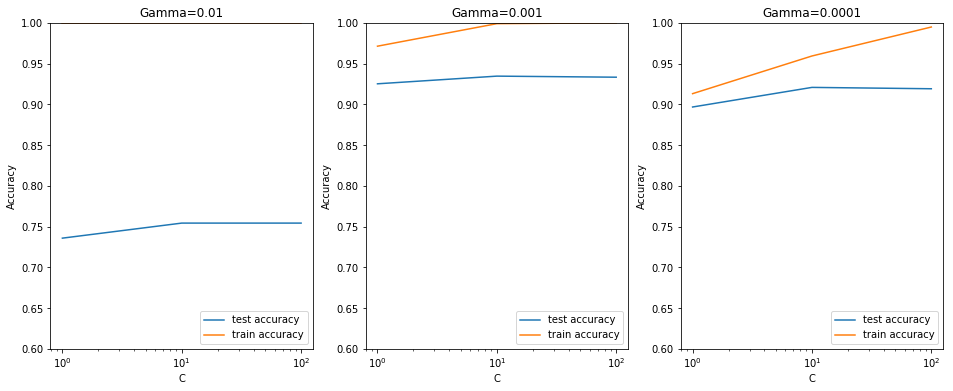

In [84]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

Thus, it seems that the best combination is gamma=0.001 and C=1 (the plot in the middle), which gives the highest test accuracy (~93%) while avoiding overfitting.

